In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import rcParams
import seaborn as sns
import pandas as pd

In [2]:
sns.set_context('paper')
rcParams['font.size'] = 10

In [3]:
%matplotlib inline

In [58]:
group = 100
delta = '0-05'
sample = 10

meas1 = 'alpha_score'
meas2 = 'chord_arc_infinity'
measure_one = '$\\alpha$ fatness'
measure_two = 'Arc $L_\infty$'

input_dir = f'../data/input/mitchell_polygons/{group}/'
output_dir =f'../data/output/mitchell_polygons/{group}/'

u_meas_1_scores = pd.read_csv(output_dir + f'u_{meas1}.csv')
u_meas_2_scores = pd.read_csv(output_dir + f'u_{meas2}.csv')

u_polygons = []
for i in range(1,11):
    u_polygons.append(Polygon(np.loadtxt(input_dir +  '{}.poly'.format(i), skiprows=1)))

u_meas_1_scores['Polygon'] = u_polygons
    
unsmoothed = u_meas_2_scores.set_index('n').join(u_meas_1_scores.set_index('n'), lsuffix=f' {measure_two}', rsuffix=f' {measure_one}').iloc[:sample]

u_fine_asorted = unsmoothed.sort_values(f'0.05 {measure_one}',ascending=True)[[f'0.05 {measure_two}', f'0.05 {measure_one}', 'Polygon']]
u_fine_csorted = unsmoothed.sort_values(f'0.05 {measure_two}',ascending=False)[[f'0.05 {measure_two}', 'Polygon']]

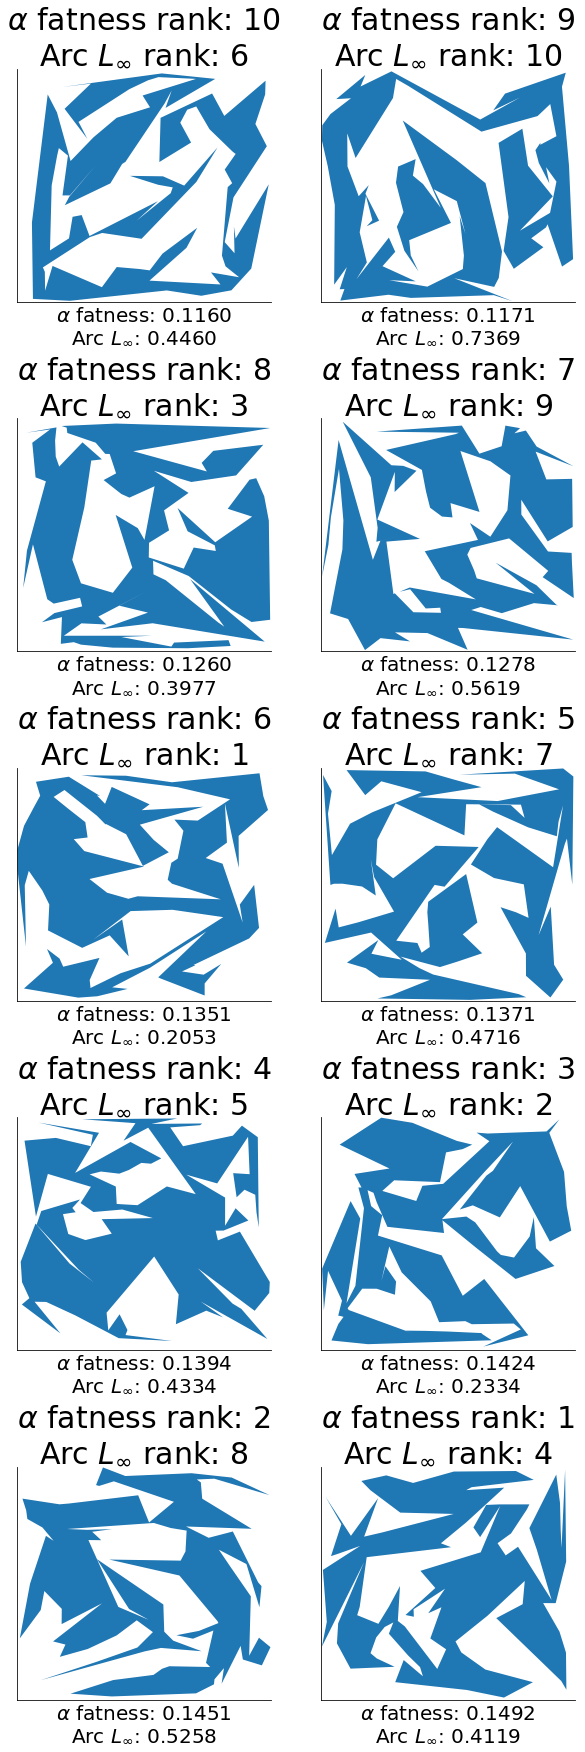

In [59]:
fig_u, axes_u = plt.subplots(5,2,figsize=(10,30))
for (i, ax) in enumerate(axes_u.reshape(sample,)):
    m1_rank = i
    polygon_name = u_fine_asorted.iloc[i].name
    m2_rank = u_fine_csorted.index.get_loc(u_fine_asorted.iloc[i].name)
    p = PatchCollection([u_fine_asorted['Polygon'].iloc[i]])
    ax.add_collection(p)
    ax.get_yaxis().set_visible(False)
    ax.set_xticks([])
    ax.set_title(f'{measure_one} rank: {sample - m1_rank}\n{measure_two} rank: {sample - m2_rank}', fontsize=30)
    ax.set_xlabel(f'{measure_one}: {(u_fine_asorted[f"0.05 {measure_one}"].iloc[i]):.4f}\n{measure_two}: {(u_fine_asorted[f"0.05 {measure_two}"].iloc[i]):.4f}', fontsize=20)
    sns.despine(ax=ax)
    
plt.subplots_adjust(hspace=0.5)
    
fig_u.savefig(f'../plots/u_{group}_{meas1}_{meas2}_vertices_{delta}_delta_ranking.jpg', bbox_inches='tight')

In [63]:
group = 10
#delta = '0-05'
sample = 10

meas1 = 'alpha_score'
meas2 = 'chord_arc_infinity'
measure_one = '$\\alpha$ fatness'
measure_two = 'Arc $L_\infty$'

input_dir = f'../data/input/mitchell_polygons/{group}/'
output_dir =f'../data/output/mitchell_polygons/{group}/'

u_meas_1_scores = pd.read_csv(output_dir + f'u_{meas1}.csv')
u_meas_2_scores = pd.read_csv(output_dir + f'u_{meas2}.csv')

u_polygons = []
for i in range(1,11):
    u_polygons.append(Polygon(np.loadtxt(input_dir +  '{}.poly'.format(i), skiprows=1)))

#u_meas_1_scores['Polygon'] = u_polygons
    
unsmoothed = u_meas_2_scores.set_index('n').join(u_meas_1_scores.set_index('n'), lsuffix=f' {measure_two}', rsuffix=f' {measure_one}').iloc[:sample]

u_fine_asorted = unsmoothed.sort_values(f'0.05 {measure_one}',ascending=True)
u_fine_csorted = unsmoothed.sort_values(f'0.05 {measure_two}',ascending=False)

In [41]:
data = u_fine_asorted.loc[1]

In [66]:
print(u_meas_1_scores.transpose().iloc[1:].to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &         0 &       1 &         2 &         3 &         4 &         5 &         6 &         7 &         8 &         9 \\
\midrule
0.05     &  0.235427 &  0.2199 &  0.117528 &  0.039914 &  0.151625 &  0.038972 &  0.120079 &  0.103945 &  0.129039 &  0.132901 \\
0.155556 &  0.235427 &  0.2199 &  0.117528 &  0.039914 &  0.151625 &  0.038972 &  0.120079 &  0.103945 &  0.129039 &  0.132901 \\
0.261111 &  0.235427 &  0.2199 &  0.117528 &  0.039914 &  0.151625 &  0.038972 &  0.120079 &  0.103945 &  0.129039 &  0.132901 \\
0.366667 &  0.235427 &  0.2199 &  0.117528 &  0.039914 &  0.151625 &  0.038972 &  0.120079 &  0.103945 &  0.129039 &  0.132901 \\
0.472222 &  0.235427 &  0.2199 &  0.117528 &  0.039914 &  0.151625 &  0.038972 &  0.120079 &  0.103945 &  0.129039 &  0.132901 \\
0.577778 &  0.235427 &  0.2199 &  0.117528 &  0.039914 &  0.151625 &  0.038972 &  0.120079 &  0.103945 &  0.129039 &  0.132901 \\
0.683333 &  0.235427 &  0.2199 &  0.117528 &  0.0

In [60]:
print(u_meas_1_scores.transpose().iloc[1:].to_latex())

\begin{tabular}{lllllllllll}
\toprule
{} &                                 0 &                                1 &                                2 &                                 3 &                                4 &                                 5 &                                 6 &                                 7 &                                 8 &                                9 \\
\midrule
0.05    &                          0.149187 &                         0.139443 &                         0.116001 &                          0.142355 &                         0.125972 &                          0.127796 &                          0.137078 &                          0.117082 &                          0.135147 &                         0.145115 \\
0.525   &                          0.149187 &                         0.139443 &                         0.116001 &                          0.142355 &                         0.125972 &                          0.127796 &  

In [57]:
pd.DataFrame.to_latex?

Signature: pd.DataFrame.to_latex(self, buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, bold_rows=False, column_format=None, longtable=None, escape=None, encoding=None, decimal='.', multicolumn=None, multicolumn_format=None, multirow=None)
Docstring:
Render an object to a tabular environment table. You can splice
this into a LaTeX document. Requires \\usepackage{booktabs}.

.. versionchanged:: 0.20.2
   Added to Series

`to_latex`-specific options:

bold_rows : boolean, default False
    Make the row labels bold in the output
column_format : str, default None
    The columns format as specified in `LaTeX table format
    <https://en.wikibooks.org/wiki/LaTeX/Tables>`__ e.g 'rcl' for 3
    columns
longtable : boolean, default will be read from the pandas config module
    Default: False.
    Use a longtable environment instead of tabular. Requires adding
    a \\usepackage{longtable} to you

In [45]:
data

0.05 Arc $L_\infty$          0.832948
0.155556 Arc $L_\infty$      0.797067
0.261111 Arc $L_\infty$      1.000000
0.366667 Arc $L_\infty$      0.898827
0.472222 Arc $L_\infty$      0.612477
0.577778 Arc $L_\infty$      0.612477
0.683333 Arc $L_\infty$      0.612477
0.788889 Arc $L_\infty$      0.612477
0.894444 Arc $L_\infty$      0.612477
1 Arc $L_\infty$             0.612477
0.05 $\alpha$ fatness        0.235427
0.155556 $\alpha$ fatness    0.235427
0.261111 $\alpha$ fatness    0.235427
0.366667 $\alpha$ fatness    0.235427
0.472222 $\alpha$ fatness    0.235427
0.577778 $\alpha$ fatness    0.235427
0.683333 $\alpha$ fatness    0.235427
0.788889 $\alpha$ fatness    0.235427
0.894444 $\alpha$ fatness    0.235427
1 $\alpha$ fatness           0.235427
Name: 1, dtype: float64